**Import Library**

In [142]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

**Data Understanding**

In [143]:
dataset = pd.read_csv('./lang_scores.csv')
dataset

,Unnamed: 0,Reading,Listening,Speaking,Writing,LangLevel
0,0,0.15,0.38,0.22,0.24,1
1,1,0.06,0.06,0.02,0.35,1
2,2,0.24,0.28,0.01,0.39,1
3,3,0.33,0.08,0.05,0.07,1
4,4,0.12,0.21,0.13,0.12,1
...,...,...,...,...,...,...
295,295,0.99,0.87,0.93,0.99,3
296,296,0.82,0.99,0.94,0.81,3
297,297,0.86,0.94,0.81,0.92,3
298,298,0.87,0.92,0.81,0.97,3


In [144]:
dataset.describe()

,Unnamed: 0,Reading,Listening,Speaking,Writing,LangLevel
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,0.505433,0.512200,0.465733,0.519967,2.006667
std,86.746758,0.275526,0.275298,0.280242,0.277404,0.809613
min,0.000000,0.000000,0.000000,0.010000,0.010000,1.000000
25%,74.750000,0.310000,0.287500,0.220000,0.297500,1.000000
50%,149.500000,0.525000,0.520000,0.440000,0.570000,2.000000
75%,224.250000,0.730000,0.750000,0.690000,0.742500,3.000000
max,299.000000,1.000000,0.990000,0.990000,1.000000,3.000000


In [145]:
dataset.isnull().sum()

Unnamed: 0    0
Reading       0
Listening     0
Speaking      0
Writing       0
LangLevel     0
dtype: int64

In [146]:
dataset.dtypes

Unnamed: 0      int64
Reading       float64
Listening     float64
Speaking      float64
Writing       float64
LangLevel       int64
dtype: object

In [147]:
dataset.corr()

,Unnamed: 0,Reading,Listening,Speaking,Writing,LangLevel
Unnamed: 0,1.000000,0.887735,0.883067,0.914218,0.881328,0.900512
Reading,0.887735,1.000000,0.844408,0.874050,0.849934,0.895069
Listening,0.883067,0.844408,1.000000,0.887416,0.862021,0.901459
Speaking,0.914218,0.874050,0.887416,1.000000,0.896579,0.919503
Writing,0.881328,0.849934,0.862021,0.896579,1.000000,0.908085
LangLevel,0.900512,0.895069,0.901459,0.919503,0.908085,1.000000


<AxesSubplot: >

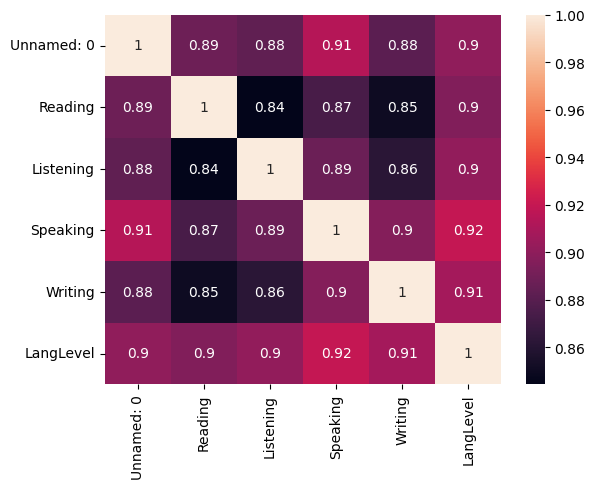

In [148]:
sns.heatmap(dataset.corr(), annot = True)

In [149]:
dataset.drop('LangLevel', axis = 1, inplace = True)
dataset.drop('Reading', axis=1, inplace=True)
dataset.drop('Listening', axis=1, inplace=True)
dataset.drop('Unnamed: 0', axis = 1, inplace = True)

In [150]:
dataset

,Speaking,Writing
0,0.22,0.24
1,0.02,0.35
2,0.01,0.39
3,0.05,0.07
4,0.13,0.12
...,...,...
295,0.93,0.99
296,0.94,0.81
297,0.81,0.92
298,0.81,0.97


In [151]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# print(scaler.fit(dataset))
# dataset

**Modelling**

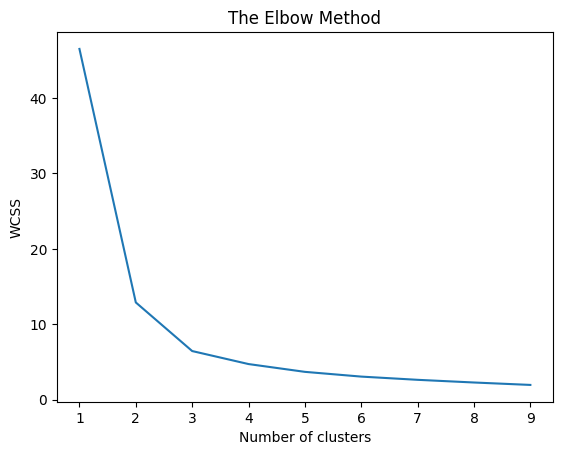

In [152]:
from sklearn.cluster import KMeans
wcss=[]

# asumsi jumlah K berada di antara 1 sampai 10
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [153]:
from sklearn.cluster import KMeans

# menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)

# fitting input data
kmeans = kmeans.fit(dataset)

# mendapatkan cluster labels
labels = kmeans.predict(dataset)

# mendapatkan nilai centroid
centroids = kmeans.cluster_centers_

In [154]:
centroids

array([[0.15809524, 0.20152381],
       [0.45091954, 0.54758621],
       [0.77675926, 0.80731481]])

In [155]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(dataset)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [156]:
pred = y_kmeans

In [157]:
dataset

,Speaking,Writing
0,0.22,0.24
1,0.02,0.35
2,0.01,0.39
3,0.05,0.07
4,0.13,0.12
...,...,...
295,0.93,0.99
296,0.94,0.81
297,0.81,0.92
298,0.81,0.97


In [158]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(dataset, labels)

0.5294006151696091

**Visualization**

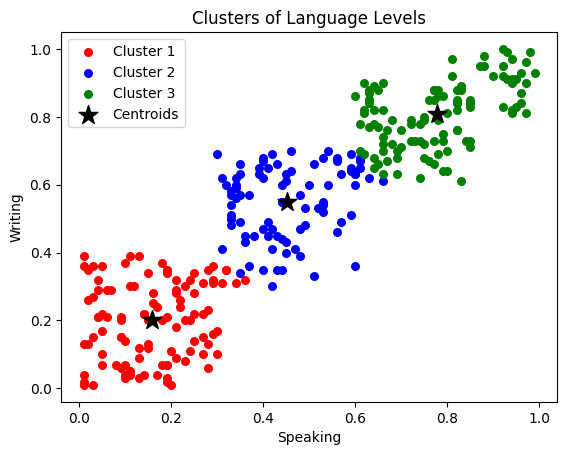

In [159]:
#Visualizing all the clusters 
#dataset = dataset.values
plt.scatter(dataset[pred == 0]['Speaking'], dataset[pred == 0]['Writing'], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(dataset[pred == 1]['Speaking'], dataset[pred == 1]['Writing'], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(dataset[pred == 2]['Speaking'], dataset[pred == 2]['Writing'], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids',marker = '*')
plt.title('Clusters of Language Levels')
plt.xlabel('Speaking')
plt.ylabel('Writing')
plt.legend()
plt.show()



In [160]:
dataset['Cluster'] = pred

In [161]:
#jumlah anggota masing-masing cluster
dataset['Cluster'].value_counts()

2    108
0    105
1     87
Name: Cluster, dtype: int64

In [162]:
dataset.dtypes

Speaking    float64
Writing     float64
Cluster       int32
dtype: object

In [163]:
dataset

,Speaking,Writing,Cluster
0,0.22,0.24,0
1,0.02,0.35,0
2,0.01,0.39,0
3,0.05,0.07,0
4,0.13,0.12,0
...,...,...,...
295,0.93,0.99,2
296,0.94,0.81,2
297,0.81,0.92,2
298,0.81,0.97,2


In [164]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))